In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import torch

import sys
sys.path.append('..')
from imitation_learning.model.modules.harmonics.cylindrical_harmonics import CylindricalHarmonics

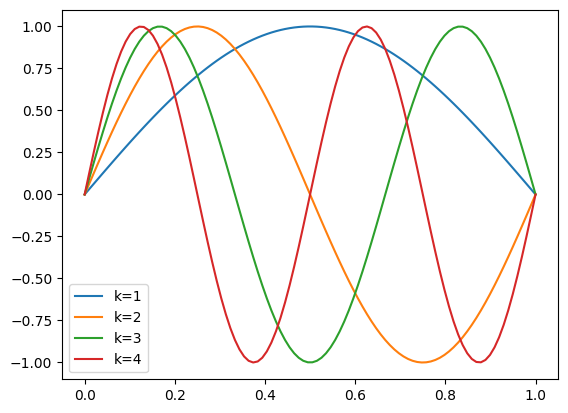

In [15]:
z = np.linspace(0,1,100)
plt.plot(z, np.sin(np.pi * 1 * z), label='k=1')
plt.plot(z, np.sin(np.pi * 2 * z), label='k=2')
plt.plot(z, np.sin(np.pi * 3 * z), label='k=3')
plt.plot(z, np.sin(np.pi * 4 * z), label='k=4')
plt.legend()

In [21]:
N = 1
M = 2
K = 1

num_r = 100
num_p = 360
num_z = 100

r = torch.linspace(0, 1,num_r)
p = torch.linspace(0,2*np.pi,num_p)
z = torch.linspace(0,1,num_z)

harmonics = CylindricalHarmonics(N,M,K, 1.0, 1.0, num_r, num_p, num_z)

In [22]:
Pnm = torch.randn(1,5)
out = harmonics.evaluate(Pnm)
print(out.shape)

torch.Size([1, 100, 360, 100])


Text(0.5, 1.0, 'N=1, M=2, K=1 - R=1')

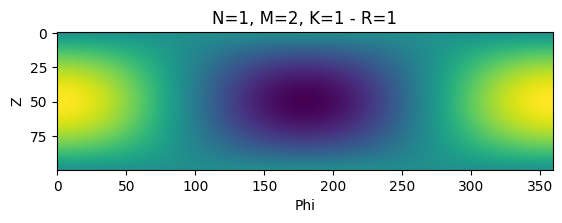

In [31]:
plt.imshow(harmonics.Psi[0,1,-1,:,:].permute(1,0))
plt.xlabel('Phi')
plt.ylabel('Z')
plt.title('N=1, M=2, K=1 - R=1')

Text(0, 0.5, 'Z')

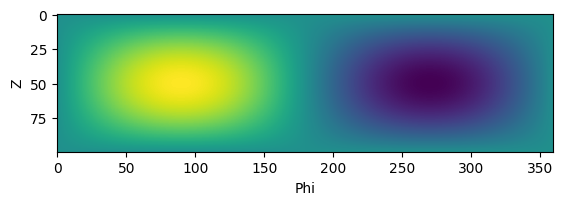

In [30]:
plt.imshow(harmonics.Psi[0,2,-1,:,:].permute(1,0))
plt.xlabel('Phi')
plt.ylabel('Z')

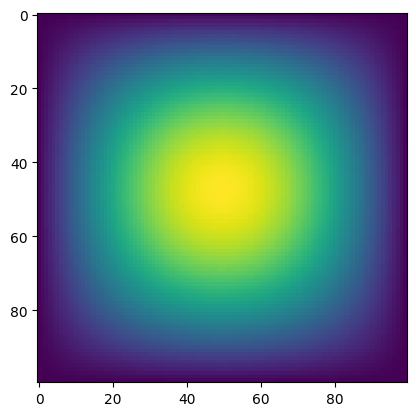

In [42]:
plt.imshow(harmonics.Psi[0,2,:,100,:])

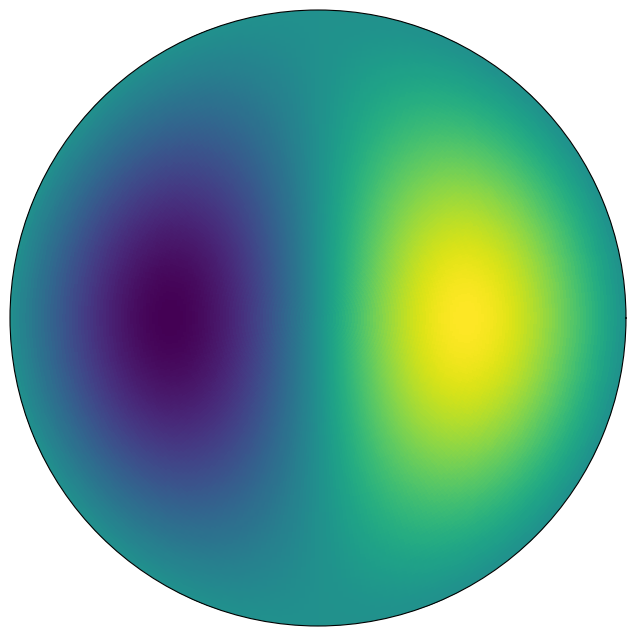

In [35]:
fig, ax = plt.subplots(ncols=1, nrows=1, subplot_kw={'projection': 'polar'}, figsize=(16,8))
ax.pcolormesh(p, r, harmonics.Psi[0,1,:,:,-1])
ax.grid(False)
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()